In [175]:
import numpy as np
import random
import pandas as pd
import math
from random import randint
import matplotlib.pyplot as plt

In [182]:
def readfile(file):

    # ----- read data -----
    df = pd.read_csv(file)
    df = df.fillna(method = 'ffill')

    # ----- Create Features -----
    X = df.drop(['id','class'], axis=1).copy(deep=False)
    X = (X-X.min())/(X.max()-X.min())

    # ----- Create Desired outputs -----
    Y = df[['class']].copy(deep=False)

    Input = X.to_numpy()
    Output = Y.to_numpy()

    return Input,Output

Input,Output = readfile('data/wdbc.csv')

In [183]:
def cross_val(features,labels,val=90):
    train_features = []
    train_labels = []
    all_samples = len(features)
    train_value = int(all_samples * val/100)
    cross_list = list(range(all_samples)) 
    random.shuffle(cross_list)
    for i in range(train_value):
        train_features.append(features[cross_list[i]])
        train_labels.append(labels[cross_list[i]])
    train_labels_fix = np.asarray(train_labels)
    train_features_fix = np.asarray(train_features)
    return train_features_fix,train_labels_fix

train_features,train_labels = cross_val(Input,Output)

In [184]:
class GA :
    def __init__(self,shape,hidden_shape):#shape =[input_layer, output_layer] hidden_shape=[node_num,...,node_num]
        shape[1:1] = hidden_shape 
        self.shape = shape
        # print(self.shape)
        # initiate weight
        weights = []
        for i in range(len(self.shape)-1):
            w = np.random.uniform(-2,2,(self.shape[i], self.shape[i+1]))
            weights.append(w)
        self.weights = weights

        # initiate weights_t-1
        self.flag = False
        self.weights_last  = np.copy(self.weights)
        self.outputs = None
        self.fitness_value = None

        # initiate activations
        activations = []
        for i in range(len(self.shape)):
            a = np.zeros(self.shape[i])
            activations.append(a)
        self.activations = activations       
        # print(self.weights)
        # print(np.shape(self.weights))
    
    def Feed_forward(self, X):
        activations = X
        self.activations[0] = X
        for i, w in enumerate(self.weights):
            # calculate NN_input
            v = np.dot(activations, w)
            activations = self.sigmoid(v)
            self.activations[i+1] = activations
        return activations

    def cut_off_func(self,predict):
        pred = predict.copy()
        for i in range(len(pred)):
            if(pred[i] > 0.5):
                pred[i] = 1
            else:
                pred[i] = 0
        return pred

    def fitness(self,pred,labels):
        true_m = labels.copy()
        Temp = 0
        for i in range(len(labels)):
            if((pred[i][0] - true_m[i][0]) == 0) :
                Temp = Temp + 1

        print(' ----------------------------------------')
        print('Accuracy : '+str(Temp/len(labels)))
        self.fitness_value = (Temp/len(labels))
        return (Temp/len(labels))
        # return 0

    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1-s)
        return 1/(1 + np.exp(-s))



 ----------------------------------------
Accuracy : 0.609375
 ----------------------------------------
Accuracy : 0.6328125
 ----------------------------------------
Accuracy : 0.626953125
 ----------------------------------------
Accuracy : 0.37109375
 ----------------------------------------
Accuracy : 0.63671875
 ----------------------------------------
Accuracy : 0.62109375
 ----------------------------------------
Accuracy : 0.375
 ----------------------------------------
Accuracy : 0.69921875
 ----------------------------------------
Accuracy : 0.625
 ----------------------------------------
Accuracy : 0.626953125
 ----------------------------------------
Accuracy : 0.62890625
 ----------------------------------------
Accuracy : 0.646484375
 ----------------------------------------
Accuracy : 0.626953125
 ----------------------------------------
Accuracy : 0.623046875
 ----------------------------------------
Accuracy : 0.623046875
 ----------------------------------------
Accur

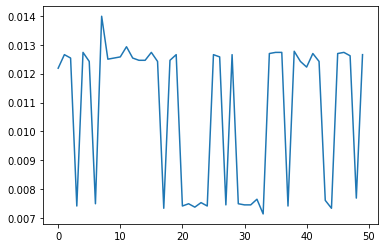

In [188]:
fitness = []
population = {}
for i in range(50):
    ga = GA([30,1],[2,2])
    predict = ga.Feed_forward(train_features)
    pred_fix = ga.cut_off_func(predict)
    fitness.append((ga.fitness(pred_fix,train_labels))/50)
    train_features,train_labels = cross_val(Input,Output)
    population["GA"+str(i)] = ga
# print(fitness)
print(population["GA1"])
plt.plot(fitness, label="fitness")
plt.show()
